In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#import scikitplot as skplt

In [97]:
import numpy as np
import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, header = None)

In [98]:
 test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=1, skipinitialspace=True,header = None)
    

In [99]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [100]:
df=train_set.append(test_set)

In [101]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
df.shape

(48842, 15)

In [103]:
[df[col].value_counts() for col in df.columns]

[36    1348
 35    1337
 33    1335
 23    1329
 31    1325
       ... 
 88       6
 85       5
 87       3
 89       2
 86       1
 Name: age, Length: 74, dtype: int64,
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
 Name: workclass, dtype: int64,
 203488    21
 120277    19
 190290    19
 125892    18
 126569    18
           ..
 170272     1
 137444     1
 172327     1
 111368     1
 208174     1
 Name: fnlwgt, Length: 28523, dtype: int64,
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool  

In [104]:
df.wage_class = df['wage_class'].map({'<=50K' : 0, '>50K' :1, '<=50K.' : 0, '>50K.' :1})

In [105]:
df = df[(df!= '?').all(axis=1)]

C:\Users\inite\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [106]:
df.shape

(45222, 15)

In [107]:
for column in df:
    enc=LabelEncoder()
    if df.dtypes[column]==np.object:
         df[column]=enc.fit_transform(df[column])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258E34D3A08>,
      dtype=object)

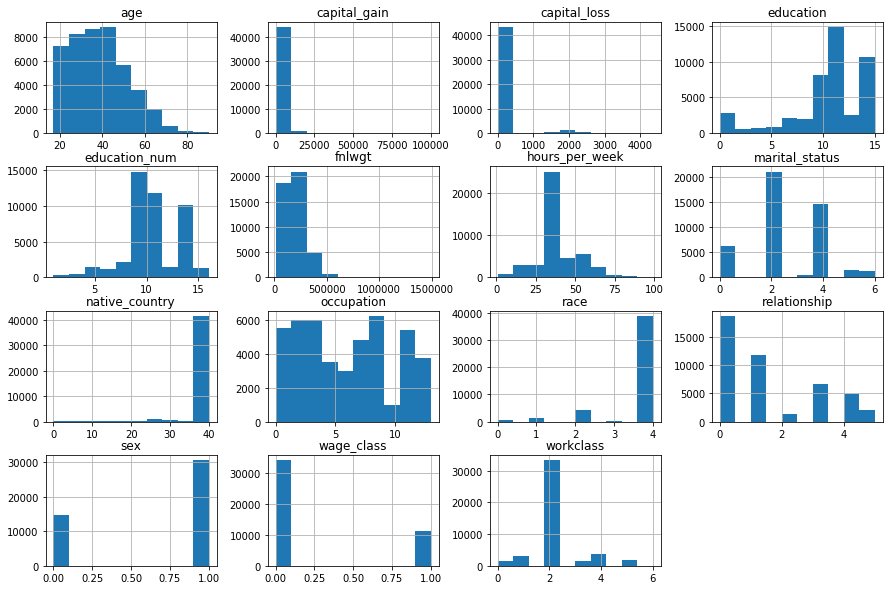

In [108]:
df.hist(figsize=(15,10))

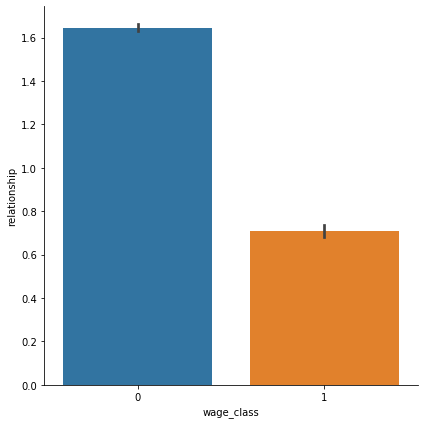

In [109]:
sns.catplot(y='relationship',x='wage_class',data=df,kind='bar',height=6)


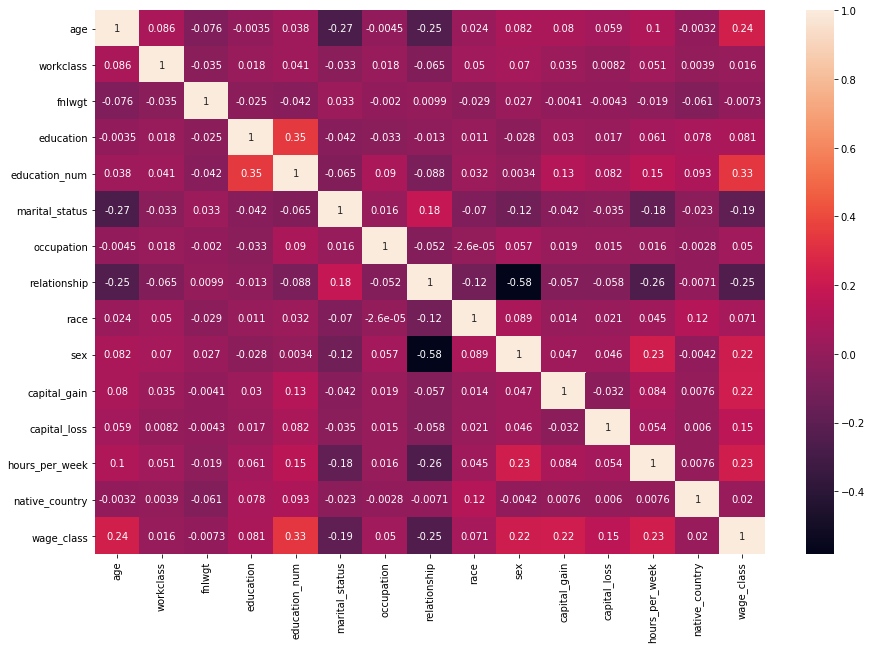

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [111]:
df=df.drop(['education','fnlwgt','native_country'],axis=1)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45222 non-null  int64
 1   workclass       45222 non-null  int32
 2   education_num   45222 non-null  int64
 3   marital_status  45222 non-null  int32
 4   occupation      45222 non-null  int32
 5   relationship    45222 non-null  int32
 6   race            45222 non-null  int32
 7   sex             45222 non-null  int32
 8   capital_gain    45222 non-null  int64
 9   capital_loss    45222 non-null  int64
 10  hours_per_week  45222 non-null  int64
 11  wage_class      45222 non-null  int64
dtypes: int32(6), int64(6)
memory usage: 4.7 MB


In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

In [129]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [130]:
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [131]:
clf=LogisticRegression()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.7963070459131493
0.7965726920950802


C:\Users\inite\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [132]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.9707272576498881
0.814262023217247


In [133]:
clf=RandomForestClassifier()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.9707272576498881
0.8446655610834716


In [134]:
clf=XGBClassifier()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8630345246980126
0.8562741846323936


In [140]:
params = {
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [142]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),params, verbose=3)

In [144]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.841, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.836, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.837, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.853, total=   0.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.850, total=   0.6s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.853, total=   0.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.854, total=   0.7s
[CV]  l

[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.868, total=   7.5s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.866, total=   6.9s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.873, total=   6.7s
[CV]  learning_rate=1, max_depth=10, n_estimators=200 ................
[CV]   learning_rate=1, max_depth=10, n_estimators=200, score=0.861, total=   7.2s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.856, total=   1.3s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.856, total=   1.1s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.854, total=   1

[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.872, total=   1.9s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.869, total=   1.9s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.867, total=   1.8s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.874, total=   1.9s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.863, total=   1.8s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.875, total=   3.6s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.871, 

[CV]  learning_rate=0.1, max_depth=3, n_estimators=10 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=10, score=0.837, total=   0.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.853, total=   0.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.850, total=   0.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.853, total=   0.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.854, total=   0.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.847, total=   0.8s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100 ...............
[CV] 

[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.866, total=   8.6s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.873, total=   8.4s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.861, total=   8.4s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.856, total=   1.0s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.856, total=   1.2s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.854, total=   1.2s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=10 ...............
[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.85

[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.872, total=   2.9s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.869, total=   3.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.867, total=   2.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.874, total=   2.2s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=100, score=0.863, total=   2.3s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.875, total=   4.1s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=

[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.836, total=   0.2s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=10, score=0.837, total=   0.2s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.853, total=   0.7s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.850, total=   0.9s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.853, total=   0.8s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.854, total=   0.7s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ........

[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.871, total=   8.3s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.868, total=   8.3s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.866, total=   8.6s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.873, total=   8.2s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.861, total=   9.1s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=20, n_estimators=10, score=0.856, total=   1.0s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=10 .............
[CV]   learning_rate=0.001, max_depth=20, n_estimator

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 27.4min finished


GridSearchCV(estimator=XGBClassifier(),
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [145]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}

In [146]:
clf=XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 200)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.9137020759045803
0.8553897180762853
